# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
agg_funcions = ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']

In [4]:
sinasc_raw['FAIXA_LATITUDE'] = np.where(sinasc_raw['munResLat'] < -10.5, 'Abaixo de -10.5', 'Acima de -10.5')
sinasc_raw[['FAIXA_LATITUDE', 'CONSULTAS', 'SEMAGESTAC']].groupby('FAIXA_LATITUDE').agg(agg_funcions)

CONSULTAS                                               \
                      sum      mean min max median       std       var   
FAIXA_LATITUDE                                                           
Abaixo de -10.5     48000  3.694297   1   9    4.0  0.643372  0.413928   
Acima de -10.5      48663  3.467260   1   9    4.0  0.888452  0.789348   

                SEMAGESTAC                                                    
                       sum       mean   min   max median       std       var  
FAIXA_LATITUDE                                                                
Abaixo de -10.5   482665.0  38.545360  19.0  45.0   39.0  2.012435  4.049895  
Acima de -10.5    511987.0  38.588107  21.0  45.0   39.0  2.020771  4.083516

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [5]:
sinasc_raw['FAIXA_AREA'] = np.where(sinasc_raw['munResArea'] < 3000, 'Abaixo de 3000', 'Acima de 3000')
sinasc_raw[['FAIXA_AREA', 'QTDFILVIVO', 'QTDFILMORT']].groupby('FAIXA_AREA').agg(agg_funcions)

QTDFILVIVO                                                  \
                      sum      mean  min   max median       std       var   
FAIXA_AREA                                                                  
Abaixo de 3000     4773.0  0.924284  0.0  30.0    1.0  1.075442  1.156575   
Acima de 3000     22054.0  1.086886  0.0  14.0    1.0  1.191721  1.420198   

               QTDFILMORT                                                  
                      sum      mean  min   max median       std       var  
FAIXA_AREA                                                                 
Abaixo de 3000     1260.0  0.244803  0.0   4.0    0.0  0.551215  0.303838  
Acima de 3000      5384.0  0.272153  0.0  28.0    0.0  0.629087  0.395750

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [6]:
mun_res_alt = pd.qcut(sinasc_raw['munResAlt'], 4)
sinasc_raw.pivot_table(values=['APGAR1', 'APGAR5'], index=mun_res_alt, aggfunc=agg_funcions)

sum               mean              min           max  \
                 APGAR1   APGAR5    APGAR1    APGAR5 APGAR1 APGAR5 APGAR1   
munResAlt                                                                   
(84.999, 87.0]  72098.0  80321.0  8.270965  9.214294    0.0    0.0   10.0   
(87.0, 153.0]   39053.0  44646.0  8.088857  9.253057    0.0    0.0   10.0   
(153.0, 191.0]  55562.0  63330.0  8.010669  9.133256    0.0    0.0   10.0   
(191.0, 595.0]  52436.0  58842.0  8.129612  9.125620    0.0    0.0   10.0   

                      median              std                 var            
               APGAR5 APGAR1 APGAR5    APGAR1    APGAR5    APGAR1    APGAR5  
munResAlt                                                                    
(84.999, 87.0]   10.0    8.0    9.0  0.936486  0.761006  0.877006  0.579130  
(87.0, 153.0]    10.0    8.0    9.0  1.127916  0.824080  1.272194  0.679108  
(153.0, 191.0]   10.0    8.0    9.0  0.935960  0.785972  0.876022  0.617751  
(191.0, 595.0]   10.0    8.0    9.0  0.963406  0.802339  0.928151  0.643749

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

<AxesSubplot: xlabel='Meses do ano', ylabel='Média de idade'>

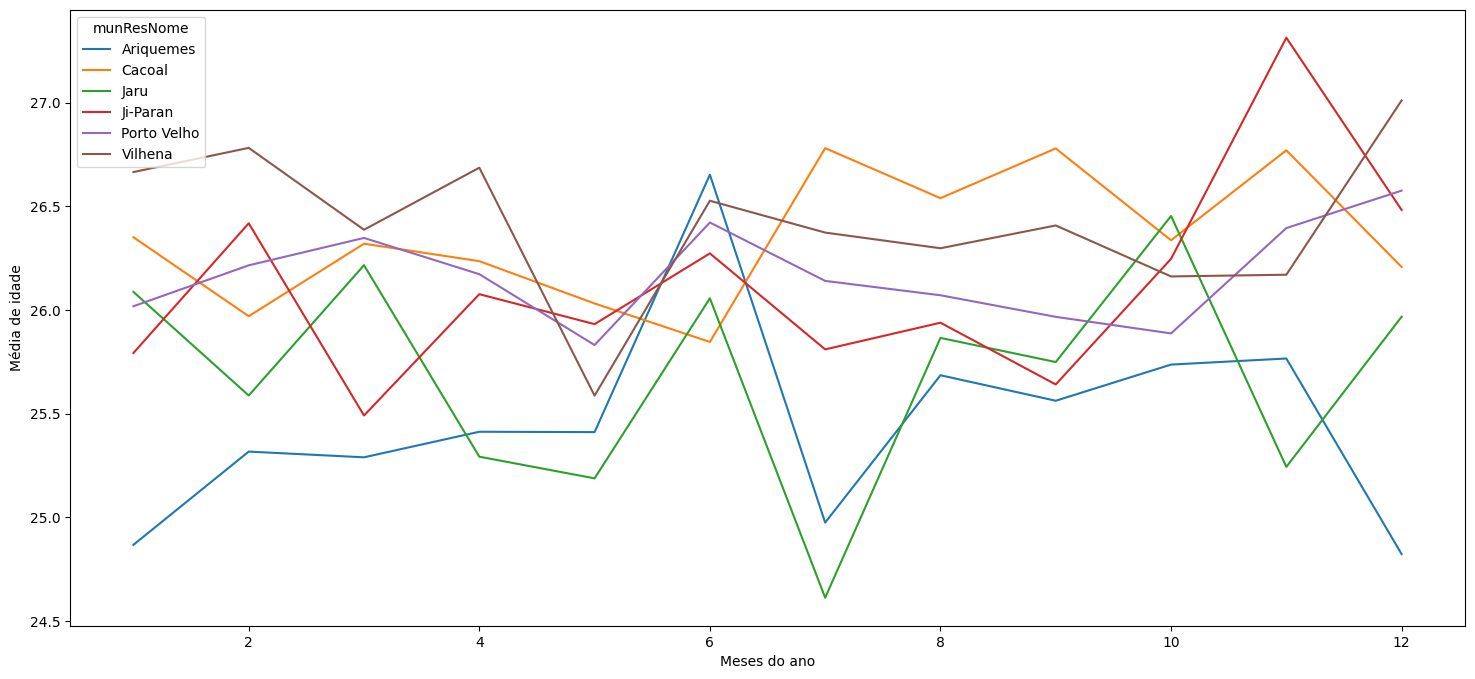

In [7]:
imadiatas = {
    "candeias do jamari" : "Porto Velho",
    "guajará-mirim" : "Porto Velho",
    "itapuã do oeste" : "Porto Velho",
    "nova mamoré" : "Porto Velho",
    "porto velho" : "Porto Velho",
    "alto paraíso" : "Ariquemes",
    "ariquemes" : "Ariquemes",
    "buritis" : "Ariquemes",
    "cacaulândia" : "Ariquemes",
    "campo novo de rondônia" : "Ariquemes",
    "cujubim" : "Ariquemes",
    "monte negro" : "Ariquemes",
    "rio crespo" : "Ariquemes",
    "governador jorge teixeira" : "Jaru",
    "jaru" : "Jaru",
    "machadinho d'oeste" : "Jaru",
    "theobroma" : "Jaru",
    "vale do anari" : "Jaru",
    "alvorada d'oeste" : "Ji-Paran",
    "costa marques" : "Ji-Paran",
    "ji-paraná" : "Ji-Paran",
    "mirante da serra" : "Ji-Paran",
    "nova união" : "Ji-Paran",
    "ouro preto do oeste" : "Ji-Paran",
    "presidente médici" : "Ji-Paran",
    "são francisco do guaporé" : "Ji-Paran",
    "são miguel do guaporé" : "Ji-Paran",
    "seringueiras" : "Ji-Paran",
    "teixeirópolis" : "Ji-Paran",
    "urupá" : "Ji-Paran",
    "vale do paraíso" : "Ji-Paran",
    "alta floresta d'oeste" : "Cacoal",
    "alto alegre dos parecis" : "Cacoal",
    "cacoal" : "Cacoal",
    "castanheiras" : "Cacoal",
    "espigão d'oeste" : "Cacoal",
    "ministro andreazza" : "Cacoal",
    "nova brasilândia d'oeste" : "Cacoal",
    "novo horizonte do oeste" : "Cacoal",
    "parecis" : "Cacoal",
    "pimenta bueno" : "Cacoal",
    "primavera de rondônia" : "Cacoal",
    "rolim de moura" : "Cacoal",
    "santa luzia d'oeste" : "Cacoal",
    "são felipe d'oeste" : "Cacoal",
    "cabixi" : "Vilhena",
    "cerejeiras" : "Vilhena",
    "chupinguaia" : "Vilhena",
    "colorado do oeste" : "Vilhena",
    "corumbiara" : "Vilhena",
    "pimenteiras do oeste" : "Vilhena",
    "vilhena" : "Vilhena",
}

idade_mae = sinasc_raw[['munResNome', 'IDADEMAE', 'DTNASC']].copy()
idade_mae['munResNome'] = idade_mae['munResNome'].apply(str.lower)
idade_mae['munResNome'] = idade_mae['munResNome'].map(imadiatas)

idade_mae['DTNASC'] = pd.to_datetime(idade_mae['DTNASC'])
idade_mae['MESNASC'] = idade_mae['DTNASC'].dt.month
idade_mae['NOMEMES'] = idade_mae['DTNASC'].dt.month_name()
idade_mae.sort_values(by='MESNASC', inplace=True)

table = idade_mae.pivot_table(index='MESNASC', columns='munResNome', values='IDADEMAE')
table.plot(figsize=(18, 8), xlabel="Meses do ano", ylabel="Média de idade")


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [8]:
map_idh = {
    "porto velho" : "IDH-M alto",
    "vilhena" : "IDH-M alto",
    "cacoal" : "IDH-M alto",
    "ji-paraná" : "IDH-M alto",
    "pimenta bueno" : "IDH-M alto",
    "ariquemes" : "IDH-M alto",
    "rolim de moura" : "IDH-M alto",
    "cerejeiras" : "IDH-M médio",
    "jaru" : "IDH-M médio",
    "colorado do oeste" : "IDH-M médio",
    "ouro preto do oeste" : "IDH-M médio",
    "espigão d'oeste" : "IDH-M médio",
    "santa luzia d'oeste" : "IDH-M médio",
    "pimenteiras do oeste" : "IDH-M médio",
    "presidente médici" : "IDH-M médio",
    "castanheiras" : "IDH-M médio",
    "guajará-mirim" : "IDH-M médio",
    "chupinguaia" : "IDH-M médio",
    "cabixi" : "IDH-M médio",
    "candeias do jamari" : "IDH-M médio",
    "são felipe d'oeste" : "IDH-M médio",
    "cacaulândia" : "IDH-M médio",
    "são miguel do guaporé" : "IDH-M médio",
    "mirante da serra" : "IDH-M médio",
    "alvorada d'oeste" : "IDH-M médio",
    "teixeirópolis" : "IDH-M médio",
    "nova brasilândia d'oeste" : "IDH-M médio",
    "rio crespo" : "IDH-M médio",
    "primavera de rondônia" : "IDH-M médio",
    "alta floresta d'oeste" : "IDH-M médio",
    "ministro andreazza" : "IDH-M médio",
    "novo horizonte do oeste" : "IDH-M médio",
    "vale do paraíso" : "IDH-M médio",
    "alto paraíso" : "IDH-M médio",
    "parecis" : "IDH-M médio",
    "buritis" : "IDH-M médio",
    "itapuã do oeste" : "IDH-M médio",
    "corumbiara" : "IDH-M médio",
    "cujubim" : "IDH-M médio",
    "costa marques" : "IDH-M médio",
    "são francisco do guaporé" : "IDH-M médio",
    "urupá" : "IDH-M médio",
    "monte negro" : "IDH-M médio",
    "seringueiras" : "IDH-M baixo",
    "governador jorge teixeira" : "IDH-M baixo",
    "machadinho d'oeste" : "IDH-M baixo",
    "campo novo de rondônia" : "IDH-M baixo",
    "alto alegre dos parecis" : "IDH-M baixo",
    "theobroma" : "IDH-M baixo",
    "nova união" : "IDH-M baixo",
    "nova mamoré" : "IDH-M baixo",
    "vale do anari" : "IDH-M baixo"
}

idh = sinasc_raw[['munResNome', 'IDADEMAE', 'PESO']].copy()
idh['munResNome'] = idh['munResNome'].apply(str.lower)
idh.set_index('munResNome', inplace=True)
idh.groupby(map_idh).mean()

,IDADEMAE,PESO
munResNome,,
IDH-M alto,26.280332,3245.623791
IDH-M baixo,25.326944,3231.456188
IDH-M médio,25.884855,3240.847592


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [9]:
map_ifdm = {
    "ariquemes" : "Desenvolvimento moderado",
    "vilhena" : "Desenvolvimento moderado",
    "pimenta bueno" : "Desenvolvimento moderado",
    "porto velho" : "Desenvolvimento moderado",
    "ji-paraná" : "Desenvolvimento moderado",
    "cacoal" : "Desenvolvimento moderado",
    "santa luzia d'oeste" : "Desenvolvimento moderado",
    "rolim de moura" : "Desenvolvimento moderado",
    "chupinguaia" : "Desenvolvimento moderado",
    "são miguel do guaporé" : "Desenvolvimento moderado",
    "pimenteiras do oeste" : "Desenvolvimento moderado",
    "teixeirópolis" : "Desenvolvimento moderado",
    "colorado do oeste" : "Desenvolvimento moderado",
    "jaru" : "Desenvolvimento moderado",
    "rio crespo" : "Desenvolvimento moderado",
    "primavera de rondônia" : "Desenvolvimento moderado",
    "alta floresta d'oeste" : "Desenvolvimento moderado",
    "ouro preto do oeste" : "Desenvolvimento moderado",
    "são francisco do guaporé" : "Desenvolvimento moderado",
    "candeias do jamari" : "Desenvolvimento moderado",
    "buritis" : "Desenvolvimento moderado",
    "são felipe d'oeste" : "Desenvolvimento moderado",
    "presidente médici" : "Desenvolvimento moderado",
    "cerejeiras" : "Desenvolvimento moderado",
    "monte negro" : "Desenvolvimento moderado",
    "urupá" : "Desenvolvimento moderado",
    "espigão d'oeste" : "Desenvolvimento regular",
    "seringueiras" : "Desenvolvimento regular",
    "alvorada d'oeste" : "Desenvolvimento regular",
    "itapuã do oeste" : "Desenvolvimento regular",
    "cabixi" : "Desenvolvimento regular",
    "novo horizonte do oeste" : "Desenvolvimento regular",
    "nova brasilândia d'oeste" : "Desenvolvimento regular",
    "vale do paraíso" : "Desenvolvimento regular",
    "corumbiara" : "Desenvolvimento regular",
    "alto paraíso" : "Desenvolvimento regular",
    "cacaulândia" : "Desenvolvimento regular",
    "vale do anari" : "Desenvolvimento regular",
    "ministro andreazza" : "Desenvolvimento regular",
    "costa marques" : "Desenvolvimento regular",
    "nova união" : "Desenvolvimento regular",
    "guajará-mirim" : "Desenvolvimento regular",
    "mirante da serra" : "Desenvolvimento regular",
    "parecis" : "Desenvolvimento regular",
    "castanheiras" : "Desenvolvimento regular",
    "theobroma" : "Desenvolvimento regular",
    "machadinho d'oeste" : "Desenvolvimento regular",
    "campo novo de rondônia" : "Desenvolvimento regular",
    "nova mamoré" : "Desenvolvimento regular",
    "cujubim" : "Desenvolvimento regular",
    "alto alegre dos parecis" : "Desenvolvimento regular",
    "governador jorge teixeira" : "Desenvolvimento regular"
}

ifdm = sinasc_raw[['munResNome', 'IDADEMAE', 'PESO']].copy()
ifdm['munResNome'] = ifdm['munResNome'].apply(str.lower)
ifdm.set_index('munResNome', inplace=True)
ifdm.groupby(map_ifdm).mean()

,IDADEMAE,PESO
munResNome,,
Desenvolvimento moderado,26.223139,3243.420532
Desenvolvimento regular,25.535131,3242.203306


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [10]:
map_pib = {
    "porto velho" : "Acima de 1 Bilhão",
    "ji-paraná" : "Acima de 1 Bilhão",
    "vilhena" : "Acima de 1 Bilhão",
    "ariquemes" : "Acima de 1 Bilhão",
    "cacoal" : "Acima de 1 Bilhão",
    "jaru" : "Acima de 1 Bilhão",
    "rolim de moura" : "Acima de 1 Bilhão",
    "pimenta bueno" : "Acima de 1 Bilhão",
    "guajará-mirim" : "Acima de 500 Milhões",
    "ouro preto do oeste" : "Acima de 500 Milhões",
    "buritis" : "Acima de 500 Milhões",
    "machadinho do oeste" : "Acima de 500 Milhões",
    "espigão do oeste" : "Acima de 500 Milhões",
    "são miguel do guaporé" : "Acima de 500 Milhões",
    "candeias do jamari" : "Acima de 500 Milhões",
    "nova mamoré" : "Acima de 500 Milhões",
    "cerejeiras" : "Acima de 500 Milhões",
    "alta floresta do oeste" : "Acima de 300 Milhões",
    "presidente médici" : "Acima de 300 Milhões",
    "cujubim" : "Acima de 300 Milhões",
    "nova brasilândia do oeste" : "Acima de 300 Milhões",
    "alto paraíso" : "Acima de 300 Milhões",
    "são francisco do guaporé" : "Acima de 300 Milhões",
    "colorado do oeste" : "Acima de 300 Milhões",
    "monte negro" : "Acima de 200 Milhões",
    "alto alegre dos parecis" : "Acima de 200 Milhões",
    "campo novo de rondônia" : "Acima de 200 Milhões",
    "alvorada do oeste" : "Acima de 200 Milhões",
    "chupinguaia" : "Acima de 100 Milhões",
    "corumbiara" : "Acima de 100 Milhões",
    "ministro andreazza" : "Acima de 100 Milhões",
    "urupá" : "Acima de 100 Milhões",
    "costa marques" : "Acima de 100 Milhões",
    "seringueiras" : "Acima de 100 Milhões",
    "mirante da serra" : "Acima de 100 Milhões",
    "governador jorge teixeira" : "Acima de 100 Milhões",
    "theobroma" : "Acima de 100 Milhões",
    "santa luzia do oeste" : "Acima de 100 Milhões",
    "novo horizonte do oeste" : "Acima de 100 Milhões",
    "itapuã do oeste" : "Acima de 100 Milhões",
    "vale do paraíso" : "Acima de 100 Milhões",
    "cacaulândia" : "Acima de 100 Milhões",
    "cabixi" : "Acima de 100 Milhões",
    "vale do anari" : "Acima de 100 Milhões",
    "nova união" : "Até 100 Milhões",
    "parecis" : "Até 100 Milhões",
    "rio crespo" : "Até 100 Milhões",
    "pimenteiras do oeste" : "Até 100 Milhões",
    "teixeirópolis" : "Até 100 Milhões",
    "são felipe do oeste" : "Até 100 Milhões",
    "castanheiras" : "Até 100 Milhões",
    "primavera de rondônia" : "Até 100 Milhões"
}

pib = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI', 'PESO', 'MESPRENAT']].copy()
pib['munResNome'] = pib['munResNome'].apply(str.lower)
pib['munResNome'] = pib['munResNome'].replace("d'", 'do ')
pib.set_index('munResNome', inplace=True)
pib.groupby(map_pib).agg({'IDADEMAE' : 'mean', 'IDADEPAI' : 'mean', 'PESO' : 'mean', 'MESPRENAT' : 'sum'})

,IDADEMAE,IDADEPAI,PESO,MESPRENAT
munResNome,,,,
Acima de 1 Bilhão,26.265562,31.108387,3247.215719,108430.0
Acima de 100 Milhões,25.638424,31.744348,3250.392337,7701.0
Acima de 200 Milhões,25.146435,30.187500,3233.701349,1390.0
Acima de 300 Milhões,25.706070,30.819149,3240.387380,3924.0
Acima de 500 Milhões,25.785927,31.381955,3243.336315,67644.0
Até 100 Milhões,26.519894,31.626126,3197.679045,1524.0


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- A idade mediana das mulheres que deram a luz em municípios com maior IDH é a maior dentre todas.
- O peso dos bebes também é maior em municípios com maior IDH.
- O peso dos bebes é menor em municípios com PIB de até 100 Milhões
- A quantidade somada de consultas no pré-natal em municípios com PIB acima de 500 Milhões é quase 8x maior em relação ao sometório de consultas nas outras faixas de PIB